<a href="https://colab.research.google.com/github/RMLAI/zero-to-mastery-ml/blob/master/Pycaret_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Loading the Boston housing dataset
#import the boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [3]:
boston_df = pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
!pip install pycaret

     |████████████████████████████████| 194kB 8.0MB/s 
     |████████████████████████████████| 133kB 16.5MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 266kB 18.9MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 3.0MB 22.7MB/s 
     |████████████████████████████████| 7.0MB 28.0MB/s 
     |████████████████████████████████| 63.9MB 62kB/s 
     |████████████████████████████████| 389kB 51.6MB/s 
     |████████████████████████████████| 1.2MB 50.6MB/s 
     |████████████████████████████████| 1.6MB 50.9MB/s 
     |████████████████████████████████| 614kB 41.1MB/s 
     |████████████████████████████████| 2.1MB 43.7MB/s 
     |████████████████████████████████| 235kB 51.7MB/s 
     |████████████████████████████████| 71kB 10.7MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
     |████████████████████████████████| 6.1MB 46.0MB/s 
  

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


In [6]:
# importing all regression models
from pycaret.regression import *
model_1 = setup(data = boston_df,target='target')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,366
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [7]:
#COMPARING VARIOUS MODELS
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,CatBoost Regressor,1.953200,7.745100,2.727300,0.907300,0.130300,0.099900
1,Extra Trees Regressor,1.959200,7.694700,2.719000,0.907200,0.124200,0.098500
2,Gradient Boosting Regressor,2.112000,8.354600,2.853900,0.898300,0.142700,0.110900
3,Extreme Gradient Boosting,2.150600,8.872100,2.935100,0.893600,0.142100,0.111600
4,Random Forest,2.136700,9.516900,3.036000,0.885000,0.141400,0.110200
5,AdaBoost Regressor,2.553400,10.919900,3.264800,0.866000,0.160100,0.135000
6,Light Gradient Boosting Machine,2.260100,11.125200,3.271300,0.864600,0.147500,0.115000
7,Decision Tree,2.987100,18.946200,4.252800,0.771800,0.200800,0.157800
8,Linear Regression,3.392500,22.718800,4.684100,0.713200,0.249800,0.173900
9,Ridge Regression,3.386300,22.873500,4.698100,0.712900,0.261500,0.175100


In [8]:
ETR = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8367,5.8490,2.4185,0.9377,0.0978,0.0821
1,2.4006,16.4122,4.0512,0.8284,0.1400,0.1018
2,1.8447,6.1828,2.4865,0.9424,0.1334,0.1041
3,2.4973,10.3047,3.2101,0.9082,0.1641,0.1333
4,1.8036,7.0734,2.6596,0.9087,0.1112,0.0884
5,1.4573,4.8390,2.1998,0.9422,0.0972,0.0743
6,1.9840,5.6785,2.3830,0.8938,0.1061,0.0949
7,2.1122,9.2563,3.0424,0.8644,0.1330,0.0952
8,1.9987,6.8409,2.6155,0.9145,0.1544,0.1240
9,1.6571,4.5101,2.1237,0.9314,0.1052,0.0874


In [9]:
#printing the model
print(ETR)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=366, verbose=0, warm_start=False)


In [10]:
#Tuning the model
tuned_ETR = tune_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.8645,6.4758,2.5448,0.9310,0.1055,0.0862
1,2.4420,21.0201,4.5848,0.7803,0.1505,0.1006
2,2.0523,7.7864,2.7904,0.9275,0.1571,0.1237
3,3.0093,14.3521,3.7884,0.8721,0.1850,0.1543
4,2.1627,14.7553,3.8413,0.8096,0.1410,0.1029
5,1.6740,5.6789,2.3830,0.9322,0.1036,0.0839
6,1.9003,5.6287,2.3725,0.8948,0.1019,0.0895
7,2.2551,9.2790,3.0461,0.8640,0.1330,0.1014
8,2.0864,7.6220,2.7608,0.9047,0.1655,0.1326
9,1.7568,4.7357,2.1762,0.9279,0.1023,0.0892


In [11]:
#print the tuned model
print(tuned_ETR)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=30, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=2,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=30, n_jobs=None, oob_score=False,
                    random_state=366, verbose=0, warm_start=False)


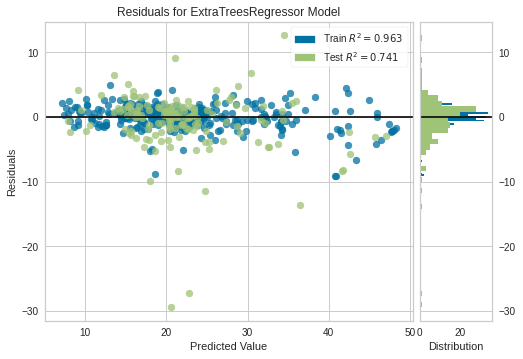

In [13]:
#plot the model
plot_model(tuned_ETR)

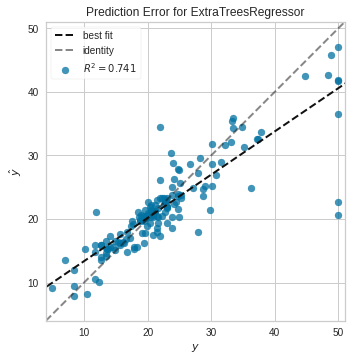

In [14]:
#plotting the errors
plot_model(tuned_ETR,plot='error')

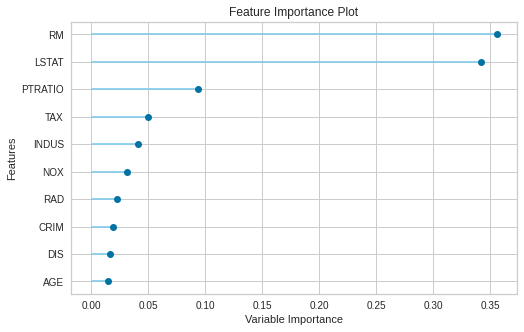

In [15]:
#plotting the importance of features
plot_model(tuned_ETR,plot='feature')

In [16]:
evaluate_model(tuned_ETR)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…